# Import

In [2]:
import numpy as np
import pandas as pd
import sys
import os

from path import Path

import importlib
import matplotlib
import matplotlib.pyplot as plt

# Dataset

In [ ]:
# Загрузка данных 

def get_train():
    df = pd.read_csv("./Data/waterflood-master/waterflood-master/data/train/train_data.csv")
    df['MEASURED_IN_DATE'] = pd.to_datetime(df['MEASURED_IN_DATE'])
    df['MEASURED_IN'] = pd.to_datetime(df['MEASURED_IN'])
    df['KCHARWORK'] = df['KCHARWORK'].astype(int).astype('object')
    print(df.shape)
    print(df["WELL_NAME"].nunique())
    return df

df = get_train()

df.head()

(177575, 11)
266


,MEASURED_IN_DATE,WELL_NAME,KCHARWORK,CHARWORK,MEASURED_IN,LIQ_RATE,WATER_CUT,P_ZAB,INTAKE,WELLHEAD_PRESSURE,IS_WORKING
0,2017-02-01,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-01 12:00:00,0.0,0.0,NaN,225.0,150.0,True
1,2017-02-02,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-02 00:00:00,0.0,0.0,NaN,225.0,150.0,True
2,2017-02-03,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-03 00:00:00,0.0,0.0,NaN,225.0,150.0,True
3,2017-02-04,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-04 00:00:00,0.0,0.0,NaN,225.0,150.0,True
4,2017-02-05,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-05 00:00:00,0.0,0.0,NaN,225.0,150.0,True


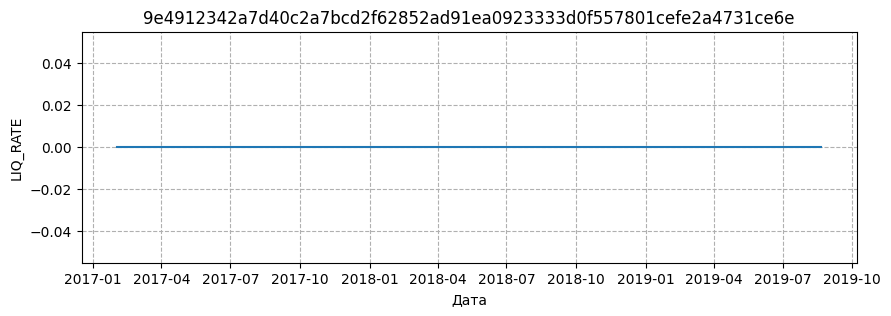

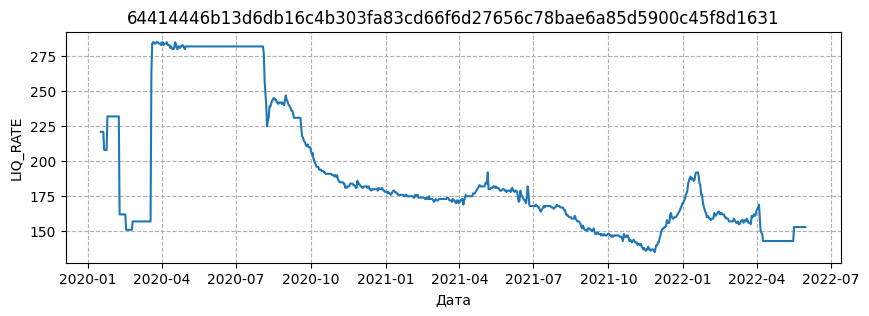

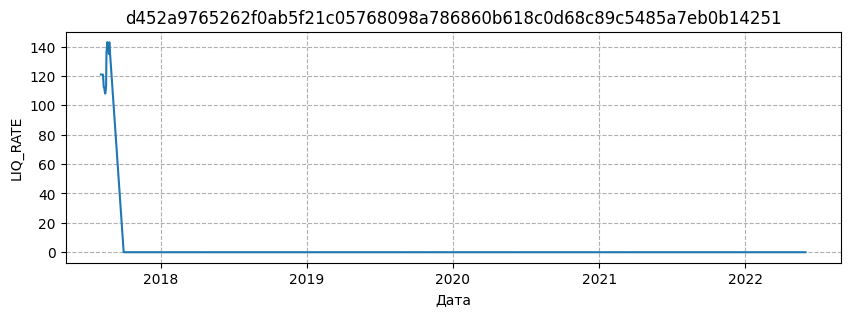

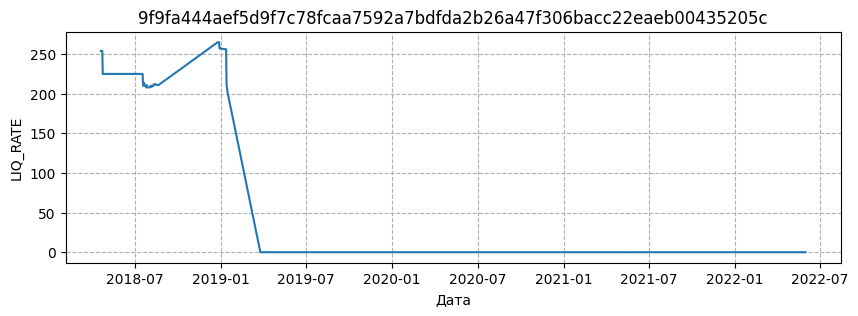

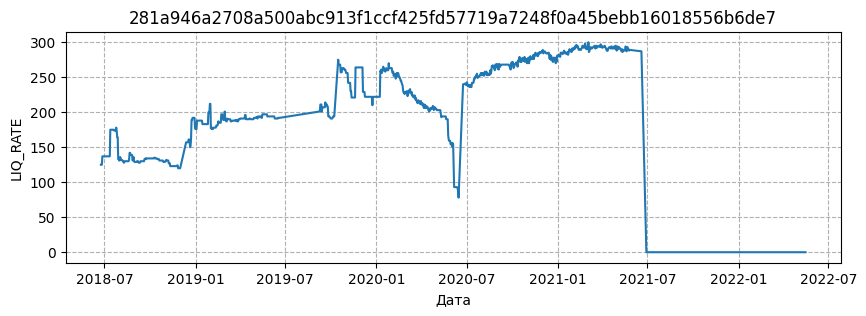

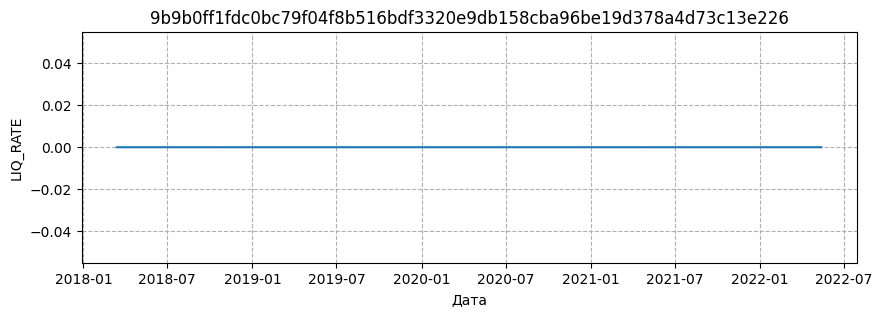

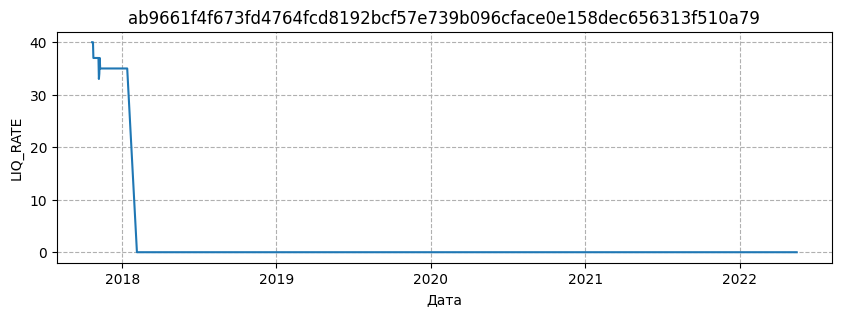

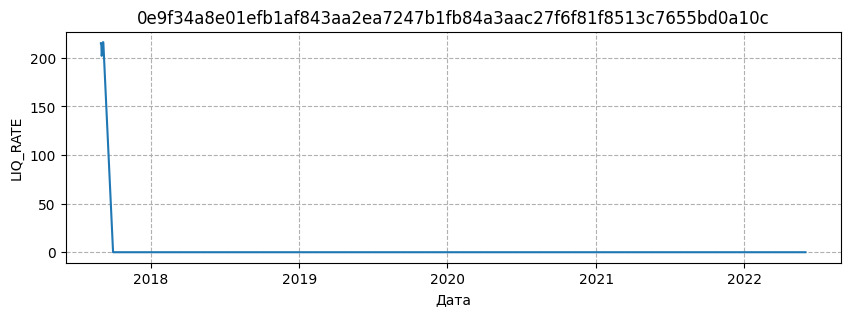

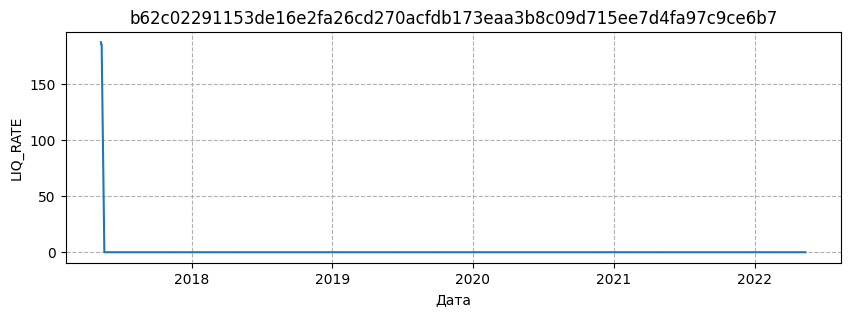

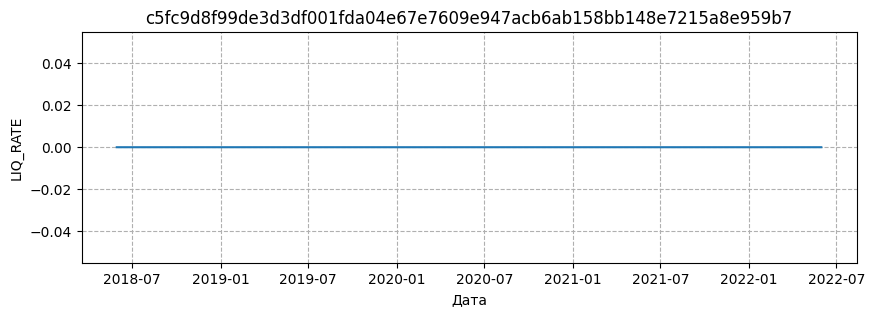

In [ ]:
# Коэффициент ликвидности скважин

param = "LIQ_RATE"

for well in df['WELL_NAME'].unique()[:10]:
    tmp = df[df['WELL_NAME'] == well]
    plt.figure(figsize=(10, 3))
    
    plt.plot(tmp["MEASURED_IN_DATE"], tmp[param])
    plt.grid(ls="--")
    plt.title(well)
    plt.xlabel("Дата")
    plt.ylabel(param)

In [ ]:
# Добавление типа скважины

grouped_df = df.groupby(["WELL_NAME"], as_index=True).agg({"CHARWORK": ["unique"]})
grouped_df.columns = ["_".join(x).rstrip("_") for x in grouped_df.columns.ravel()]
grouped_df["CHARWORK_unique"] = [
    ",".join(map(str, l)) for l in grouped_df["CHARWORK_unique"]
]
grouped_df.head()

,CHARWORK_unique
WELL_NAME,
02567341ea1c840299c4a0b74a8cd59dff5b1dd2af69ddd253c0938443317eb8,"НЕФ,НАГ"
0471418bf3f22977041f4016205e646cba1214e82e6d636d4f7abfe3eb00dbd9,НЕФ
05e1e718d93d96a73e6ddb6a307fe5de60fc53249d760cd81b13a6e7255d708e,НЕФ
06252c150957a6ca28111b094eb923bfa74d2a66928655e9cb7cb671ed159ecf,"НЕФ,НАГ"
067468377b3cf69697d91de11e79d036135ceff0a601655e9f5c78bda3818b9c,НЕФ


In [ ]:
df.groupby(
    [
        "WELL_NAME",
        "CHARWORK",
        "KCHARWORK",
    ],
    as_index=True,
).agg({"MEASURED_IN_DATE": ["count"]}).head()

MEASURED_IN_DATE
                                                                                 count
WELL_NAME                                          CHARWORK KCHARWORK                 
02567341ea1c840299c4a0b74a8cd59dff5b1dd2af69ddd... НАГ      20                     616
                                                   НЕФ      11                     150
0471418bf3f22977041f4016205e646cba1214e82e6d636... НЕФ      11                     419
05e1e718d93d96a73e6ddb6a307fe5de60fc53249d760cd... НЕФ      11                     441
06252c150957a6ca28111b094eb923bfa74d2a66928655e... НАГ      20                    1215

In [ ]:
# Получение координат скважин

def get_coords():
    df = pd.read_csv("./Data/waterflood-master/waterflood-master/data/train/coords.csv")
    print(df.shape)
    print(df["WELL_NAME"].nunique())
    return df

coords = get_coords()

coords = coords[coords["WELL_NAME"].isin(df["WELL_NAME"].unique())]
print(coords.shape)
print(coords["WELL_NAME"].nunique())

coords = pd.merge(coords, grouped_df, on="WELL_NAME", how="left")

display(coords.head())
display(coords.info())

(424, 5)
424
(266, 5)
266


,WELL_NAME,COORD_X,COORD_Y,X2,Y2,CHARWORK_unique
0,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.20,НЕФ
1,59e8ab92b257d0809933a49847143f08b2143d238856e8...,14147.72,4947.28,13926.47,5554.19,НЕФ
2,281a946a2708a500abc913f1ccf425fd57719a7248f0a4...,11009.72,8856.28,11029.73,8939.46,"НЕФ,НАГ"
3,6ab87d3e097b485c5bdd13b3940ec9c160fe5e77163d2e...,13982.72,6816.28,13947.17,6771.63,НАГ
4,488e60d7575cbd8757674c7e03a8a736a90a5d1245a4ce...,14170.72,6362.28,14229.18,6398.64,"НЕФ,НАГ"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WELL_NAME        266 non-null    object 
 1   COORD_X          266 non-null    float64
 2   COORD_Y          266 non-null    float64
 3   X2               266 non-null    float64
 4   Y2               266 non-null    float64
 5   CHARWORK_unique  266 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.6+ KB


None

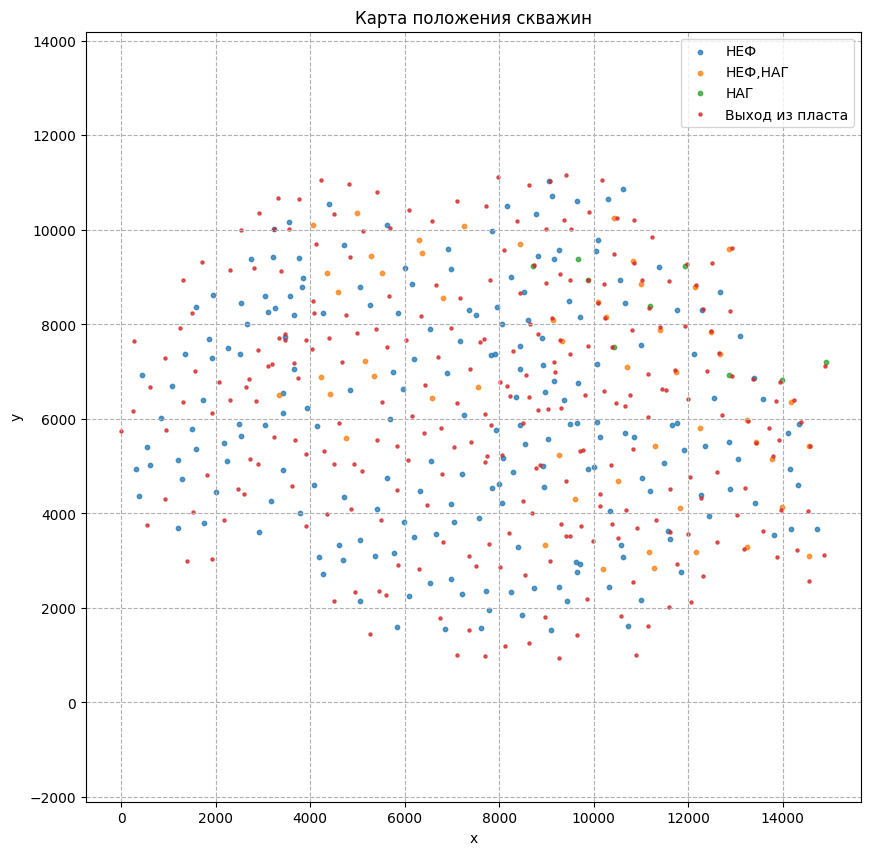

In [ ]:
# Отображение скважин на карте


plt.figure(figsize=(10, 10))

for well_type in coords["CHARWORK_unique"].unique():
    tmp = coords[coords["CHARWORK_unique"] == well_type].copy()
    plt.scatter(
        tmp["COORD_X"],
        tmp["COORD_Y"],
        label = well_type,
        s = 10,
        alpha = 0.75
    )

plt.scatter(coords["X2"], coords["Y2"], label="Выход из пласта", s = 5, alpha = 0.75)

plt.title("Карта положения скважин")
plt.axis("equal")
plt.grid(ls="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [ ]:
# Получение ГТМ скважин

def get_gtm():
    df = pd.read_csv("./Data/waterflood-master/waterflood-master/data/train/gtm.csv")
    df["START_DATE_FACT"] = pd.to_datetime(df["START_DATE_FACT"])
    df["END_DATE_FACT"] = pd.to_datetime(df["END_DATE_FACT"])
    
    print(df.shape)
    print(df['WELL_NAME'].nunique())
    
    return df

gtm = get_gtm()

gtm = gtm[gtm["WELL_NAME"].isin(df["WELL_NAME"].unique())]

print(gtm.shape)
print(gtm["WELL_NAME"].nunique())

gtm.head()

(577, 4)
368
(417, 4)
266


,WELL_NAME,GEOTECH_ACTION,START_DATE_FACT,END_DATE_FACT
0,7f19ddcfcd2d874f2cf0dc982fccd173de21e99e87488f...,Из бурения,2020-10-03,2020-10-06
1,613f15a5a89a63c1f6e61ea5466461b46c8168e91c3293...,Из бурения,2020-07-01,2020-08-12
2,879329a0f238b019636f868a76bcbca2114b2b4135938f...,ИДН,2020-01-22,2020-01-28
3,a0cee26b395d55edbcc8ba5eb5f0c88d7b584ba2c5e318...,Из бурения,2020-11-14,2020-12-13
4,56deb052231234f854d9258f05d17ed2ad8727e2d6e63a...,Из бурения,2020-11-17,2020-12-13


In [10]:
#Единые данные по скважинам

wells = pd.merge(coords, gtm, on="WELL_NAME", how="left")

display(wells.head())
display(wells.info())

,WELL_NAME,COORD_X,COORD_Y,X2,Y2,CHARWORK_unique,GEOTECH_ACTION,START_DATE_FACT,END_DATE_FACT
0,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.20,НЕФ,Из бурения,2018-09-08,2018-09-10
1,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.20,НЕФ,ИДН,2021-03-20,2021-03-25
2,59e8ab92b257d0809933a49847143f08b2143d238856e8...,14147.72,4947.28,13926.47,5554.19,НЕФ,ИДН,2020-10-04,2020-10-08
3,59e8ab92b257d0809933a49847143f08b2143d238856e8...,14147.72,4947.28,13926.47,5554.19,НЕФ,Из бурения,2018-08-08,2018-08-28
4,281a946a2708a500abc913f1ccf425fd57719a7248f0a4...,11009.72,8856.28,11029.73,8939.46,"НЕФ,НАГ",ОПЗ,2020-06-15,2020-06-21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   WELL_NAME        417 non-null    object        
 1   COORD_X          417 non-null    float64       
 2   COORD_Y          417 non-null    float64       
 3   X2               417 non-null    float64       
 4   Y2               417 non-null    float64       
 5   CHARWORK_unique  417 non-null    object        
 6   GEOTECH_ACTION   417 non-null    object        
 7   START_DATE_FACT  417 non-null    datetime64[ns]
 8   END_DATE_FACT    417 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 29.4+ KB


None

# Convert to CSV

In [12]:
wells.to_csv("./Data/wells.csv", index=False)